# <font style = "color:rgb(50,120,229)">Skin Smoothing</font>

In previous modules we have seen how we can use grabcut for detecting skin region given the image of a face. The detected skin can then be smoothened and applied back to the original image, thereby resulting in a skin smoothened image. 

In this project, you will be implementing **Skin Smoothing** but this time the image will contain regions other than face as well and will have to be completely automated.

You can use the following steps to approach this problem:

1. Detect the faces in the image using Deep Learning or HAAR Cascades
2. Iterate over the detected faces and apply smoothing filter. You can experiment with the filter type and size to see which one (or combination) gives the best result.

In [90]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from dataPath import DATA_PATH
%matplotlib inline

In [91]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [92]:
# Read image
img = cv2.imread(DATA_PATH + "images/hillary_clinton.jpg")

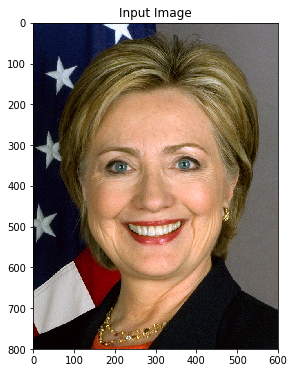

In [93]:
plt.imshow(img[:,:,::-1])
plt.title("Input Image")
plt.show()

In [94]:
# Load the cascade classifier from the xml file.
faceCascade = cv2.CascadeClassifier(DATA_PATH + 'models/haarcascade_frontalface_default.xml')
minNeighbors = 7


In [95]:
#convert the image to gray
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [96]:
#perform face detection
faces = faceCascade.detectMultiScale(imgGray,1.2,minNeighbors)
faces

array([[ 82, 184, 433, 433]], dtype=int32)

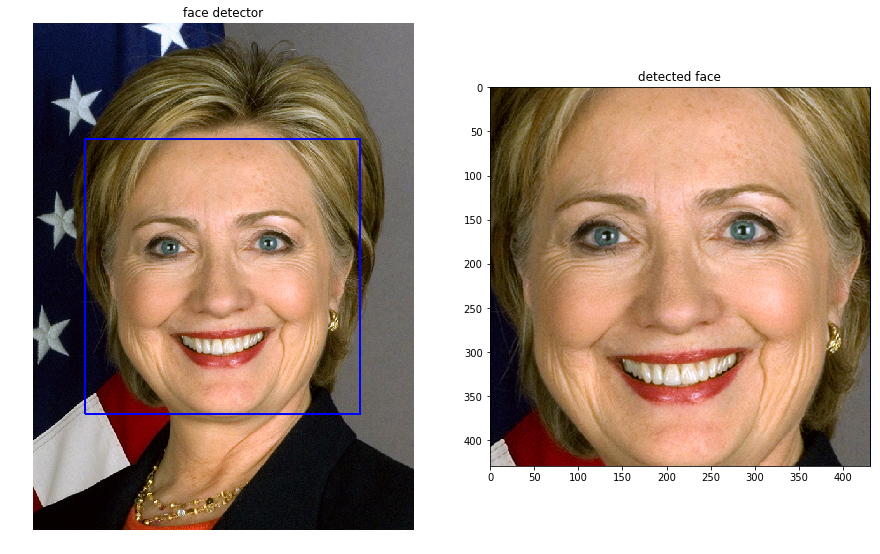

In [97]:
imgClone = img.copy()
plt.figure(figsize = (15,10))
for (x,y,w,h) in faces:
    cv2.rectangle(imgClone, (x, y), 
                      (x + w, y + h), 
                      (255, 0, 0),2)
    plt.subplot(1,2,1)
    plt.title('face detector')
    plt.axis('off')
    plt.imshow(imgClone[...,::-1])
    #crop the image
    croppedImg = imgClone[(y+2):(y+h-2),(x+2):(x+w)]
    plt.subplot(1,2,2)
    plt.title('detected face')
    plt.imshow(croppedImg[...,::-1])
   # plt.axis('off')
    

Text(0.5,1,'chin')

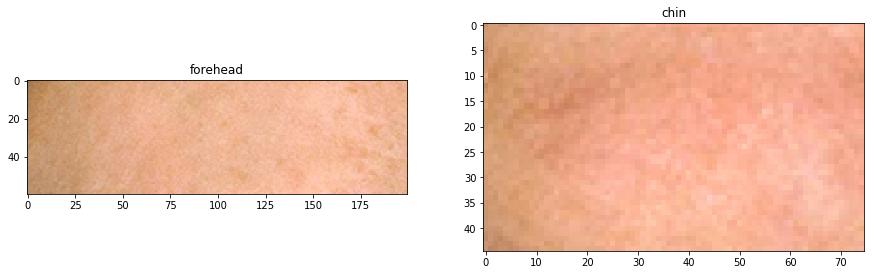

In [98]:
# get a skinpatch from forehead and chin
forehead = croppedImg[40:100,100:300]
chin = croppedImg[375:420,175:250]
plt.figure(figsize = (15,10))
plt.subplot(1,2,1);plt.imshow(forehead[...,::-1]);plt.title('forehead')
plt.subplot(1,2,2);plt.imshow(chin[...,::-1]);plt.title('chin')


In [99]:
#converting image to a color space to make skin detection easier
croppedImgHSV = cv2.cvtColor(croppedImg, cv2.COLOR_BGR2HSV)
foreheadHSV = cv2.cvtColor(forehead,cv2.COLOR_BGR2HSV)
chinHSV = cv2.cvtColor(chin,cv2.COLOR_BGR2HSV)
#find min and max values of h,s,v 
min_forehead = foreheadHSV.min(axis = (0,1))
max_forehead = foreheadHSV.max(axis = (0,1))
print('min forehead ',min_forehead)
print('max forehead ',max_forehead)
min_chin = chinHSV.min(axis = (0,1))
max_chin = chinHSV.max(axis = (0,1))
print('min chin ',min_chin)
print('max chin ',max_chin)
min = np.minimum(min_forehead,min_chin)
max = np.maximum(max_forehead,max_chin)
#min[-1] = min[-1]+15 #for not getting right eyebrow
print("min",min)
print("max",max)



min forehead  [  6  65 152]
max forehead  [ 17 150 255]
min chin  [  4  58 188]
max chin  [ 15 141 255]
min [  4  58 152]
max [ 17 150 255]


In [100]:
#create a mask for skin region 
cloneCroppedImage = croppedImgHSV.copy()
skinRegionMask = cv2.inRange(cloneCroppedImage, min,max)

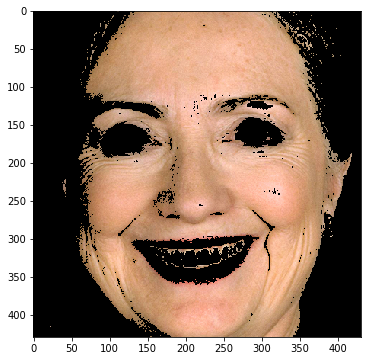

In [101]:
# get only the skin region from the detected face region of BGR
skinRegion = cv2.bitwise_and(croppedImg,croppedImg,mask = skinRegionMask)
plt.imshow(skinRegion[...,::-1])


Text(0.5,1,'Bilateral Blur Result')

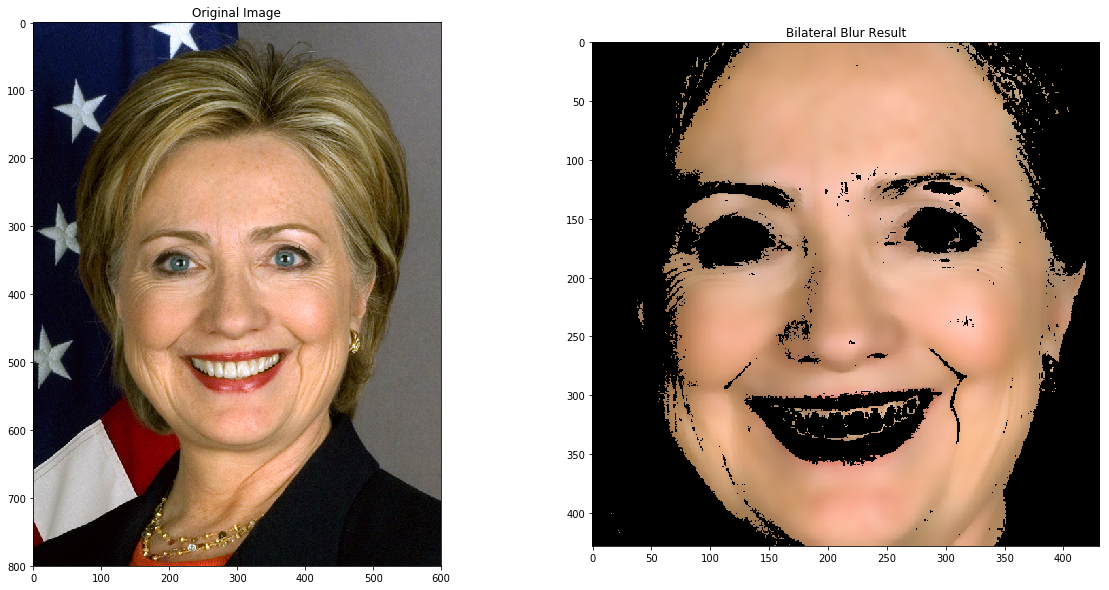

In [102]:
#apply bilateral filter
# diameter of the pixel neighbourhood used during filtering
dia=15;

# Larger the value the distant colours will be mixed together 
# to produce areas of semi equal colors
sigmaColor=80

# Larger the value more the influence of the farther placed pixels 
# as long as their colors are close enough
sigmaSpace=80

#Apply bilateralFilter
smooth_skin = cv2.bilateralFilter(skinRegion, dia, sigmaColor, sigmaSpace)

plt.figure(figsize=[20,10])
plt.subplot(121);plt.imshow(img[...,::-1]);plt.title("Original Image")
plt.subplot(122);plt.imshow(smooth_skin[...,::-1]);plt.title("Bilateral Blur Result")

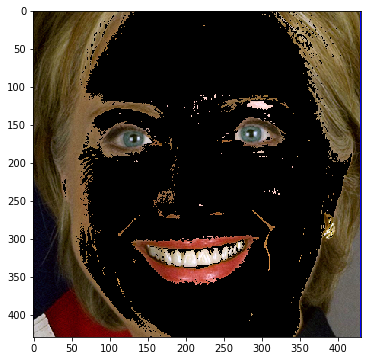

In [103]:
#combine bilateral blur image with non skin region
inverted_mask = cv2.bitwise_not(skinRegionMask)
non_skin = cv2.bitwise_and(croppedImg,croppedImg,mask = inverted_mask)
plt.imshow(non_skin[...,::-1])

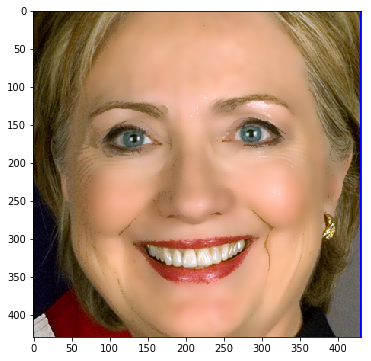

In [104]:
#smoothened cropped image
smoothened_image = cv2.add(non_skin,smooth_skin)
plt.imshow(smoothened_image[...,::-1])

(-0.5, 599.5, 799.5, -0.5)

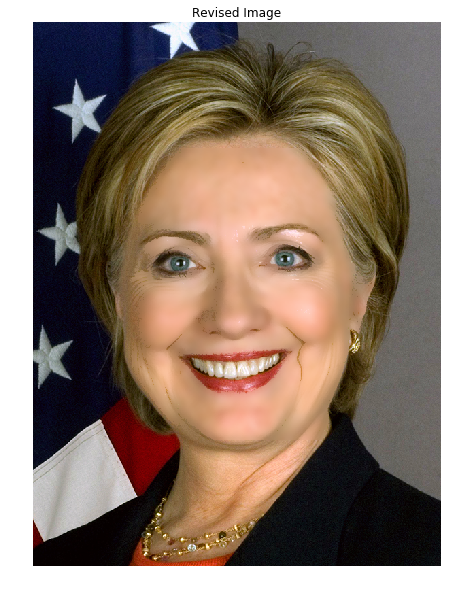

In [105]:
#final image
img[(y+2):(y+h-2),(x+2):(x+w)] = smoothened_image
plt.figure(figsize = (10,10))
plt.imshow(img[...,::-1])
plt.title('Revised Image')
plt.axis('off')